In [ ]:
# Libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [ ]:
dropout_df = pd.read_csv('dataset.csv')

In [ ]:
dropout_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


We should try to figure out what the numbers actually represent (possibly these: https://github.com/carmelh/SQL_projects/tree/main/student_data_analysis/Datasets).
Based on literature, financial status seem to be the most influential as to whether a students graduates or drops out:

In [ ]:
#non-economic related
#courseload
dropout_units = dropout_df.copy([['Curricular units 2nd sem (enrolled)', 'Target']])
#age
dropout_age = dropout_df.copy(['Age at enrollment', 'Target'])
dropout_attendance = dropout_df.copy(['Daytime/evening attendance', 'Target'])


#economic
#tuition fees up to date
dropout_tuition = dropout_df.copy([['Tuition fees up to date', 'Target']])

#scholarship holder
dropout_scholarship = dropout_df.copy([['Scholarship holder', 'Target']])


# Graphs


In [ ]:
fig = px.histogram(dropout_attendance, x="Daytime/evening attendance", color="Target", barmode="group", title="Age at Enrollment vs. Target")
fig.show()

#What type of crosstab is best suited?




In [ ]:

print("---COUNTS---")
#show the counts of each category
crosstab = pd.crosstab(dropout_df['Scholarship holder'], dropout_df['Target'])
print(crosstab)

print("---ROW PERCENTAGES---")
# display as a percentage
#normalize = 'index' displays each row as a sum of 100%
crosstab_percent_row = pd.crosstab(dropout_df['Scholarship holder'], dropout_df['Target'], normalize = 'index')*100
print(crosstab_percent_row)

print("---COLUMN PERCENTAGES---")
#normalize = 'index' displays each row as a sum of 100%
crosstab_percent_col = pd.crosstab(dropout_df['Scholarship holder'], dropout_df['Target'], normalize = 'columns')*100
print(crosstab_percent_col)

---COUNTS---
Target              Dropout  Enrolled  Graduate
Scholarship holder                             
0                      1287       664      1374
1                       134       130       835
---ROW PERCENTAGES---
Target                Dropout   Enrolled   Graduate
Scholarship holder                                 
0                   38.706767  19.969925  41.323308
1                   12.192903  11.828935  75.978162
---COLUMN PERCENTAGES---
Target                Dropout   Enrolled   Graduate
Scholarship holder                                 
0                   90.570021  83.627204  62.200091
1                    9.429979  16.372796  37.799909


This suggests that a student having a scholarship could be a main factor in determining whether or not they graduate.

# Comparing the crosstabs of all columns


In [ ]:

for col in dropout_df.columns:
  print("---COLUMN PERCENTAGES---")
  #normalize = 'index' displays each row as a sum of 100%
  crosstab_percent_col = pd.crosstab(dropout_df[col], dropout_df['Target'], normalize = 'columns')*100
  print(crosstab_percent_col)

---COLUMN PERCENTAGES---
Target            Dropout   Enrolled   Graduate
Marital status                                 
1               83.321605  90.680101  91.217746
2               12.596763   6.549118   6.699864
3                0.070373   0.251889   0.045269
4                2.955665   2.015113   1.493889
5                0.774103   0.377834   0.497963
6                0.281492   0.125945   0.045269
---COLUMN PERCENTAGES---
Target              Dropout   Enrolled   Graduate
Application mode                                 
1                 24.278677  37.783375  48.121322
2                  0.140746   0.000000   0.045269
3                  0.140746   1.007557   0.271616
4                  5.981703   0.881612   2.127660
5                  0.211119   0.000000   0.316885
6                  0.351865   1.259446   0.679040
7                  0.351865   1.007557   1.131734
8                 18.015482  20.025189  20.688094
9                  3.166784   2.015113   2.851969
10              

This is a little hard to interpret, I will use mapping to switch these numbers to their categorical labels for columns that have a show a different split for the Dropout column.

I will be leaving some columns out including..

**Columns which do not show a significant difference in the distribution between Dropout, Enrolled and Graduate:**

*   GDP
*   Inflation rate
*   Unemployment rate
*   Curricular units 2nd sem (enrolled) [except students who graduate tend to take slightly more units ]
*   Curricular units 2nd sem (credited)
*   Curricular units 1st sem (without evaluations)
*   International
*   Educational special needs  
*   Nationality
*   Application order

 Father's occupation and Mother's occupation distribute very similarly across Dropout Enrolled and Graduate except in the set of students who dropout where a parent whose occupation is "Student" accounts for ~6% compared to ~0.5% for Enrolled and ~2% for Graduate. Similar results for the previous qualification columns.

  *note; all target results for Nationality show ~97% Portuguese which suggests the surveying was not done on a population in the United States and some trends in U.S. populations might not be showing through this data*

  *note; unsure what the Application order column means*

**Columns which do show a significant difference but are not good predictors**:

*   Curricular units 2nd sem (grade)
*   Curricular units 2nd sem (approved)
*   Curricular units 1st sem (grade)
*   Curricular units 1st sem (approved)

  *These columns show 50% of dropout students as those having 0 units which is not a useful statistic because a student deciding to take 0 units is likely the result of something else in their life*

*   Application mode

  *This column shows a difference in distribution but will not be included because it is specific to the college application process in Portugal*



**Most relevant columns:** Age at enrollment, Scholarship holder, Gender, Tuition fees up to date, Debtor, Displaced, Previous qualification, Daytime/evening attendance, Course, Marital status



In [ ]:
#make a new dataframe that only contains the columns shown/decided to be relevant
relevant_df = dropout_df[['Marital status', 'Course', 'Daytime/evening attendance','Previous qualification', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Target' ]]


#remove all rows with Enrolled as the target value
relevant_df = relevant_df[relevant_df['Target'] != 'Enrolled']
relevant_df

,Marital status,Course,Daytime/evening attendance,Previous qualification,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target
0,1,2,1,1,1,0,1,1,0,20,Dropout
1,1,11,1,1,1,0,0,1,0,19,Graduate
2,1,5,1,1,1,0,0,1,0,19,Dropout
3,1,15,1,1,1,0,1,0,0,20,Graduate
4,2,3,0,1,0,0,1,0,0,45,Graduate
...,...,...,...,...,...,...,...,...,...,...,...
4419,1,15,1,1,0,0,1,1,0,19,Graduate
4420,1,15,1,1,1,1,0,0,0,18,Dropout
4421,1,12,1,1,1,0,1,0,1,30,Dropout
4422,1,9,1,1,1,0,1,0,1,20,Graduate


In [ ]:
decoded_df = relevant_df.copy()

#decode Marital status
marital_mapping = {1: 'Single', 2: 'Married', 3: 'Widower',
                   4: 'Divorced', 5: 'Common-law marriage', 6: 'Legally separated'}
decoded_df['Marital status'] = decoded_df['Marital status'].map(marital_mapping)

#decode Course
course_mapping = {1: 'Biofuel Production Technologies', 2: 'Animation and Multimedia Design', 3: 'Social Service (evening attendance)',
                  4: 'Agronomy', 5: 'Communication Design', 6: 'Veterinary Nursing',
                  7: 'Informatics Engineering', 8: 'Management', 9: 'Social Service',
                  10: 'Equiniculture', 11: 'Tourism', 12: 'Nursing',
                  13: 'Oral Hygiene', 14: 'Advertising and Marketing Management', 15: 'Journalism and Communication',
                  16: 'Basic Education', 17: 'Management (evening attendance)'}
decoded_df['Course'] = decoded_df['Course'].map(course_mapping)

#decode Previous qualification
prev_mapping = {1: 'Secondary education', 2: 'Higher education—bachelor’s degree', 3: 'Higher education—degree',
                  4: 'Higher education—master’s degree', 5: 'Higher education—doctorate', 6: 'Frequency of higher education',
                  7: '12th year of schooling—not completed', 8: '11th year of schooling—not completed', 9: 'Other—11th year of schooling',
                  10: '10th year of schooling', 11: '10th year of schooling—not completed', 12: 'Basic education 3rd cycle (9th/10th/11th year) or equivalent',
                  13: 'Basic education 2nd cycle (6th/7th/8th year) or equivalent', 14: 'Technological specialization course', 15: 'Higher education—degree (1st cycle)',
                  16: 'Professional higher technical course', 17: '	Higher education—master’s degree (2nd cycle)'}

decoded_df['Previous qualification'] = decoded_df['Previous qualification'].map(prev_mapping)

#decode Gender
gender_mapping = {0: 'Female', 1: 'Male'}
decoded_df['Gender'] = decoded_df['Gender'].map(gender_mapping)

#decode attendance
attendance_mapping = {0: 'Evening', 1: 'Daytime'}
decoded_df['Daytime/evening attendance'] = decoded_df['Daytime/evening attendance'].map(attendance_mapping)

#decode yes/no columns
yesno_mapping = {0: 'No', 1: 'Yes'}
decoded_df['Debtor'] = decoded_df['Debtor'].map(yesno_mapping)
decoded_df['Displaced'] = decoded_df['Displaced'].map(yesno_mapping)
decoded_df['Tuition fees up to date'] = decoded_df['Tuition fees up to date'].map(yesno_mapping)
decoded_df['Scholarship holder'] = decoded_df['Scholarship holder'].map(yesno_mapping)

decoded_df

,Marital status,Course,Daytime/evening attendance,Previous qualification,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target
0,Single,Animation and Multimedia Design,Daytime,Secondary education,Yes,No,Yes,Male,No,20,Dropout
1,Single,Tourism,Daytime,Secondary education,Yes,No,No,Male,No,19,Graduate
2,Single,Communication Design,Daytime,Secondary education,Yes,No,No,Male,No,19,Dropout
3,Single,Journalism and Communication,Daytime,Secondary education,Yes,No,Yes,Female,No,20,Graduate
4,Married,Social Service (evening attendance),Evening,Secondary education,No,No,Yes,Female,No,45,Graduate
...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,Journalism and Communication,Daytime,Secondary education,No,No,Yes,Male,No,19,Graduate
4420,Single,Journalism and Communication,Daytime,Secondary education,Yes,Yes,No,Female,No,18,Dropout
4421,Single,Nursing,Daytime,Secondary education,Yes,No,Yes,Female,Yes,30,Dropout
4422,Single,Social Service,Daytime,Secondary education,Yes,No,Yes,Female,Yes,20,Graduate


# Visualize


In [ ]:
#bar graph is marital status vs. target
fig = px.histogram(decoded_df, x="Target", color="Marital status", barmode="group", title="Target vs. Marital status")
fig.show()

In [ ]:
#bar graph is target vs. course
fig = px.histogram(decoded_df, x="Target", color="Course", barmode="group", title="Target vs. Course")
fig.show()

In [ ]:
#bar graph is target vs. Daytime/evening attendance
fig = px.histogram(decoded_df, x="Target", color="Previous qualification", barmode="group", title="Target vs. Previous qualification")
fig.show()

In [ ]:
#bar graph is target vs. Daytime/evening attendance
fig = px.histogram(decoded_df, x="Target", color="Daytime/evening attendance", barmode="group", title="Target vs. Daytime/evening attendance")
fig.show()

#Logistic model

In [ ]:
# train-test split: We are using train-test-split function from sklearn
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dropout_scholarship, test_size=0.4)

#use sklearn logistic model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


train_input = dropout_scholarship[['Scholarship holder']]
train_output = dropout_scholarship[['Target']]

model.fit(train_input, train_output)

test_input = test_data[['Scholarship holder']]

test_output = test_data[['Target']]

predictions = model.predict(test_input)

print("predictions")
print(predictions)

print("actual")
print(test_output)

#use sklearn accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(test_output, predictions))

predictions
['Graduate' 'Graduate' 'Graduate' ... 'Graduate' 'Graduate' 'Graduate']
actual
        Target
24    Graduate
1353   Dropout
818   Enrolled
335   Graduate
1029  Graduate
...        ...
2855   Dropout
1653  Graduate
865   Graduate
3944   Dropout
1735  Graduate

[1770 rows x 1 columns]
0.5045197740112994


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# Why is logistic regression predicting Graduate for every student?


One possibility is that the majority of students graduate so the models predicts that for all of them

In [ ]:
dropout_df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


One method to account for this majority is setting the class_weight parameter to balanced which will take into account

In [ ]:
balanced_model = LogisticRegression(class_weight='balanced')


balanced_model.fit(train_input, train_output)

test_input = test_data[['Scholarship holder']]

test_output = test_data[['Target']]

predictions = balanced_model.predict(test_input)

print("predictions")
print(predictions)

print("actual")
print(test_output)

#use sklearn accuracy
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(test_output, predictions))

predictions
['Dropout' 'Dropout' 'Graduate' ... 'Graduate' 'Dropout' 'Dropout']
actual
        Target
24    Graduate
1353   Dropout
818   Enrolled
335   Graduate
1029  Graduate
...        ...
2855   Dropout
1653  Graduate
865   Graduate
3944   Dropout
1735  Graduate

[1770 rows x 1 columns]
0.47570621468926555


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#check correlations between variables and target
#encode Target column
target_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
dropout_df['Target'] = dropout_df['Target'].map(target_mapping)

# Regression on DECODED

In [ ]:
# train-test split: We are using train-test-split function from sklearn
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(relevant_df, test_size=0.4)

#use sklearn logistic model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')


train_input = relevant_df[['Age at enrollment', 'Scholarship holder', 'Gender',
                          'Tuition fees up to date', 'Debtor', 'Displaced',
                          'Previous qualification', 'Daytime/evening attendance',
                          'Course', 'Marital status']]
train_output = relevant_df[['Target']]

model.fit(train_input, train_output)

test_input = test_data[['Age at enrollment', 'Scholarship holder', 'Gender',
                          'Tuition fees up to date', 'Debtor', 'Displaced',
                          'Previous qualification', 'Daytime/evening attendance',
                          'Course', 'Marital status']]

test_output = test_data[['Target']]

predictions = model.predict(test_input)

print("predictions")
print(predictions)

print("actual")
print(test_output)

#use sklearn accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(test_output, predictions))


predictions
['Dropout' 'Graduate' 'Dropout' ... 'Graduate' 'Dropout' 'Dropout']
actual
        Target
1220   Dropout
4068  Graduate
2975  Graduate
1610   Dropout
1251  Graduate
...        ...
2103   Dropout
2039  Graduate
1232  Graduate
2795  Graduate
532   Graduate

[1452 rows x 1 columns]
0.7369146005509641


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#display predicitions as a third column
test_output['Prediction'] = predictions
test_output


,Target,Prediction
1220,Dropout,Dropout
4068,Graduate,Graduate
2975,Graduate,Dropout
1610,Dropout,Dropout
1251,Graduate,Graduate
...,...,...
2103,Dropout,Dropout
2039,Graduate,Graduate
1232,Graduate,Graduate
2795,Graduate,Dropout


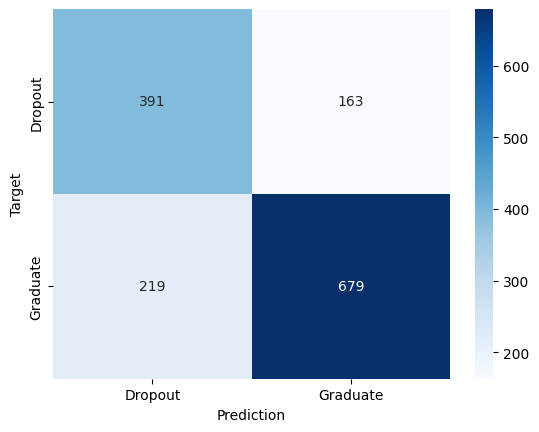

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#create a crosstabulation table
crosstab = pd.crosstab(test_output['Target'], test_output['Prediction'])


#plot the heatmap
sns.heatmap(crosstab, annot=True, fmt= ".3g", cmap="Blues")
plt.show()

overall descriptoin for presentation:
Most relevant columns determined by crosstab analysis and considering sampling bias​

Preprocessed dataset by removing irrelevant (Enrolled) rows and decoding the data from numbers to categorical labels​

Used sklearn logistic regression and test-train split model with balanced class weights to account for the difference in total amounts of Graduate and Dropout students